In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import re


In [2]:

df = pd.read_csv(r"C:\Users\iamda\Downloads\quikr_car.csv")
df.head()


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:

df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:

# now checking the name columns what happens in that column
df['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [6]:

df['name'].value_counts()[:30]

name
Honda City                                 13
Honda Amaze                                11
Maruti Suzuki Dzire                        10
Maruti Suzuki Alto 800 Lxi                  9
Mahindra Scorpio S10                        9
Maruti Suzuki Swift Dzire VXi 1.2 BS IV     7
Renault Duster                              6
Mahindra Quanto C8                          6
Mini Cooper S 1.6                           6
Mahindra Jeep CL550 MDI                     6
Hyundai Eon                                 5
Volkswagen Polo                             5
Maruti Suzuki Swift                         5
Maruti Suzuki Alto 800 Lx                   5
Ford EcoSport Titanium 1.5L TDCi            5
Maruti Suzuki Alto LXi BS III               5
Maruti Suzuki Ertiga VDi                    5
Maruti Suzuki Wagon R                       5
Tata Indigo eCS LX TDI BS III               5
Hyundai Eon Era Plus                        5
Hyundai Elite i20                           5
Mahindra XUV500              

In [7]:

df['Short_name'] = df['name'].str.split(' ').str[0:2]
df['Short_name']

0       [Hyundai, Santro]
1        [Mahindra, Jeep]
2        [Maruti, Suzuki]
3        [Hyundai, Grand]
4        [Ford, EcoSport]
              ...        
887                  [Ta]
888          [Tata, Zest]
889    [Mahindra, Quanto]
890        [Honda, Amaze]
891     [Chevrolet, Sail]
Name: Short_name, Length: 892, dtype: object

In [8]:
# Take out the nick name in the whole name of cars
df['Short_name'] = df['Short_name'].apply(lambda x: ' '.join(x))
df['Short_name']

0       Hyundai Santro
1        Mahindra Jeep
2        Maruti Suzuki
3        Hyundai Grand
4        Ford EcoSport
            ...       
887                 Ta
888          Tata Zest
889    Mahindra Quanto
890        Honda Amaze
891     Chevrolet Sail
Name: Short_name, Length: 892, dtype: object

In [9]:

df[df['Short_name']=='Ta']

,name,company,year,Price,kms_driven,fuel_type,Short_name
887,Ta,Tara,zest,"3,10,000",NaN,NaN,Ta


In [10]:

df.head()

,name,company,year,Price,kms_driven,fuel_type,Short_name
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol,Hyundai Santro
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel,Mahindra Jeep
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol,Maruti Suzuki
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol,Hyundai Grand
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel,Ford EcoSport


In [11]:
# now checking the company name 
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

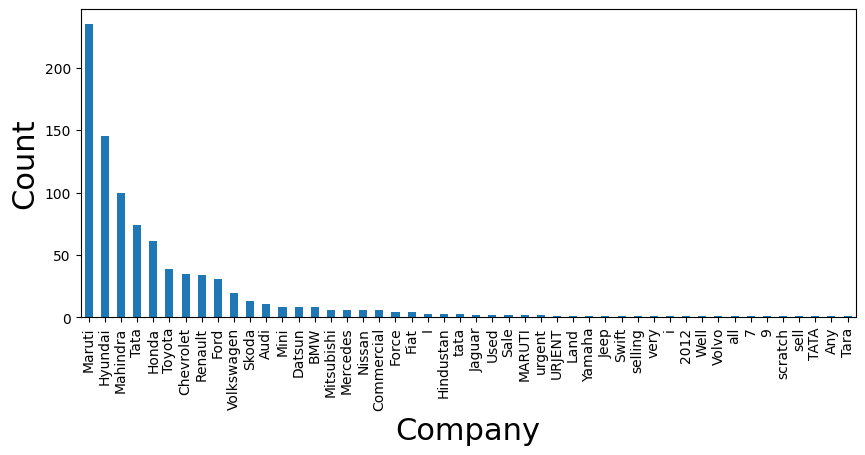

In [12]:
plt.figure(figsize=(10,4))
df['company'].value_counts().plot(kind='bar')
plt.xlabel('Company',size=22)
plt.ylabel('Count',size=22)
plt.show()

In [13]:

print(f'Shape of the datasets: {df.shape}')

Shape of the datasets: (892, 7)


In [14]:

# now checking the year
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [15]:

def convert_digit(text):
    if isinstance(text,str):
        return ''.join(char for char in text if char.isnumeric())
    
df['year'] = df['year'].apply(convert_digit)
df['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887        
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [16]:

df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000', '',
       '150', '2003', '15', '2004', '1995', '2002', '2001', '2', '4'],
      dtype=object)

In [17]:

def function(text):
    
    if text not in ['150','15','2','4','']:
        return text

df['year'] = df['year'].apply(function)
df['year']


0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    None
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [18]:

df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [19]:

def function_again(text):
    if isinstance(text,str):
        return ''.join(char for char in text if char.isnumeric())
    
df['Price'] = df['Price'].apply(function_again)
df['Price']


0       80000
1      425000
2            
3      325000
4      575000
        ...  
887    310000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 892, dtype: object

In [20]:
# so i am removing this rows
df[df['Price']=='']

,name,company,year,Price,kms_driven,fuel_type,Short_name
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,,"22,000 kms",Petrol,Maruti Suzuki
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,,"59,000 kms",Diesel,Ford EcoSport
69,I want to sell my car Tata Zest,I,2017,,NaN,NaN,I want
85,I want to sell my car Tata Zest,I,2017,,NaN,NaN,I want
138,Maruti Suzuki Alto 800 Lxi,Maruti,2018,,"28,028 kms",Petrol,Maruti Suzuki
185,"Commercial , DZire LDI, 2016, for sale",Commercial,None,,NaN,NaN,"Commercial ,"
286,"Commercial , DZire LDI, 2016, for sale",Commercial,None,,NaN,NaN,"Commercial ,"
295,Maruti Suzuki Swift LDi,Maruti,2010,,"52,000 kms",Diesel,Maruti Suzuki
304,Tata Indica eV2 LS,Tata,2017,,"84,000 kms",Diesel,Tata Indica
360,selling car Ta,selling,None,,NaN,NaN,selling car


In [21]:

df = df[df['Price']!='']


In [22]:

df.head()

,name,company,year,Price,kms_driven,fuel_type,Short_name
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol,Hyundai Santro
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel,Mahindra Jeep
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol,Hyundai Grand
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel,Ford EcoSport
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel,Ford Figo


In [23]:

df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [24]:

# Here also applying the same formula
df['kms_driven'] = df['kms_driven'].apply(function_again)
df['kms_driven']



0      45000
1         40
3      28000
4      36000
6      41000
       ...  
887     None
888    27000
889    40000
890         
891         
Name: kms_driven, Length: 857, dtype: object

In [25]:

df[df['kms_driven']=='']

,name,company,year,Price,kms_driven,fuel_type,Short_name
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,,NaN,Honda Amaze
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,160000,,NaN,Chevrolet Sail


In [26]:

df = df[df['kms_driven']!='']
df

,name,company,year,Price,kms_driven,fuel_type,Short_name
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,Hyundai Santro
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel,Mahindra Jeep
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol,Hyundai Grand
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel,Ford EcoSport
6,Ford Figo,Ford,2012,175000,41000,Diesel,Ford Figo
...,...,...,...,...,...,...,...
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel,Tata Indica
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol,Toyota Corolla
887,Ta,Tara,None,310000,None,NaN,Ta
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel,Tata Zest


In [27]:

df = df[df['year']!='']
df

,name,company,year,Price,kms_driven,fuel_type,Short_name
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,Hyundai Santro
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel,Mahindra Jeep
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol,Hyundai Grand
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel,Ford EcoSport
6,Ford Figo,Ford,2012,175000,41000,Diesel,Ford Figo
...,...,...,...,...,...,...,...
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel,Tata Indica
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol,Toyota Corolla
887,Ta,Tara,None,310000,None,NaN,Ta
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel,Tata Zest


In [28]:

df[df['name']=='Ta']

,name,company,year,Price,kms_driven,fuel_type,Short_name
887,Ta,Tara,None,310000,None,NaN,Ta


In [29]:
# remove the Ta because it is waste
df = df[df['name']!='Ta']
df

,name,company,year,Price,kms_driven,fuel_type,Short_name
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,Hyundai Santro
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel,Mahindra Jeep
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol,Hyundai Grand
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel,Ford EcoSport
6,Ford Figo,Ford,2012,175000,41000,Diesel,Ford Figo
...,...,...,...,...,...,...,...
884,tata zest 2017 f,tata,None,450000,None,NaN,tata zest
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel,Tata Indica
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol,Toyota Corolla
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel,Tata Zest


In [30]:

df.isnull().sum()

name           0
company        0
year          37
Price          0
kms_driven    37
fuel_type     38
Short_name     0
dtype: int64

In [31]:

df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

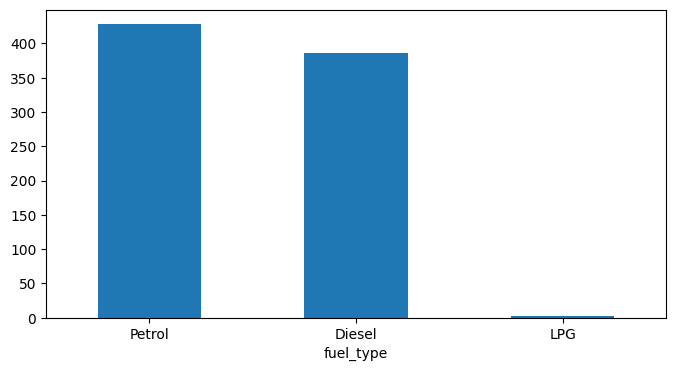

In [32]:

plt.figure(figsize=(8,4))
df['fuel_type'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.show()

In [33]:

df.dropna(inplace=True)

C:\Users\iamda\AppData\Local\Temp\ipykernel_16620\1001247032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [34]:

df.head()

,name,company,year,Price,kms_driven,fuel_type,Short_name
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,Hyundai Santro
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel,Mahindra Jeep
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol,Hyundai Grand
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel,Ford EcoSport
6,Ford Figo,Ford,2012,175000,41000,Diesel,Ford Figo


In [35]:
df['company'].

SyntaxError: invalid syntax (1783342294.py, line 1)

In [35]:

df.shape

(816, 7)

In [36]:

df['new_name'] = df['name'].str.split(' ').str[0:3]
df['new_name'] = df['new_name'].apply(lambda x: ' '.join(x))
df['new_name']

C:\Users\iamda\AppData\Local\Temp\ipykernel_16620\2489965278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_name'] = df['name'].str.split(' ').str[0:3]
C:\Users\iamda\AppData\Local\Temp\ipykernel_16620\2489965278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_name'] = df['new_name'].apply(lambda x: ' '.join(x))


0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: new_name, Length: 816, dtype: object

In [37]:

df.head()

,name,company,year,Price,kms_driven,fuel_type,Short_name,new_name
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,Hyundai Santro,Hyundai Santro Xing
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel,Mahindra Jeep,Mahindra Jeep CL550
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol,Hyundai Grand,Hyundai Grand i10
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel,Ford EcoSport,Ford EcoSport Titanium
6,Ford Figo,Ford,2012,175000,41000,Diesel,Ford Figo,Ford Figo


In [38]:

# now removing the wastage column
df.drop(columns=['name','Short_name'],axis=1,inplace=True)

C:\Users\iamda\AppData\Local\Temp\ipykernel_16620\755394306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['name','Short_name'],axis=1,inplace=True)


In [39]:

df.head()

,company,year,Price,kms_driven,fuel_type,new_name
0,Hyundai,2007,80000,45000,Petrol,Hyundai Santro Xing
1,Mahindra,2006,425000,40,Diesel,Mahindra Jeep CL550
3,Hyundai,2014,325000,28000,Petrol,Hyundai Grand i10
4,Ford,2014,575000,36000,Diesel,Ford EcoSport Titanium
6,Ford,2012,175000,41000,Diesel,Ford Figo


In [40]:

df['new_name'].value_counts()[:30]

new_name
Maruti Suzuki Swift       51
Maruti Suzuki Alto        42
Maruti Suzuki Wagon       28
Maruti Suzuki Ertiga      16
Hyundai Elite i20         15
Hyundai Grand i10         15
Hyundai Santro Xing       15
Maruti Suzuki Dzire       14
Honda City                13
Maruti Suzuki Zen         13
Honda City 1.5            12
Honda Amaze               11
Mahindra Scorpio S10      11
Tata Indigo eCS           11
Toyota Corolla Altis      10
Maruti Suzuki Omni         9
Maruti Suzuki Ritz         8
Mini Cooper S              8
Tata Indica V2             8
Chevrolet Beat LS          7
Mahindra Quanto C8         6
Renault Duster             6
Ford EcoSport Titanium     6
Renault Duster 85          6
Tata Indigo CS             6
Toyota Innova 2.5          6
Mahindra Jeep CL550        6
Hyundai Verna Fluidic      6
Chevrolet Beat LT          6
Mahindra Scorpio VLX       6
Name: count, dtype: int64

In [41]:

def preprocess(text):
    if text in ['Maruti Suzuki Swift','Maruti Suzuki Alto','Maruti Suzuki Wagon','Maruti Suzuki Ertiga','Hyundai Elite i20','Hyundai Grand i10',
                'Hyundai Santro Xing','Maruti Suzuki Dzire','Honda City','Maruti Suzuki Zen','Honda City 1.5','Honda Amaze','Mahindra Scorpio S10',
                'Tata Indigo eCS','Toyota Corolla Altis','Maruti Suzuki Omni','Maruti Suzuki Ritz','Mini Cooper S','Tata Indica V2','Chevrolet Beat LS']:
        return text
    else:
        return 'Others Car name'

df['new_name'] = df['new_name'].apply(preprocess)
df['new_name']


C:\Users\iamda\AppData\Local\Temp\ipykernel_16620\2787809892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_name'] = df['new_name'].apply(preprocess)


0       Hyundai Santro Xing
1           Others Car name
3         Hyundai Grand i10
4           Others Car name
6           Others Car name
               ...         
883      Maruti Suzuki Ritz
885          Tata Indica V2
886    Toyota Corolla Altis
888         Others Car name
889         Others Car name
Name: new_name, Length: 816, dtype: object

In [42]:

df['new_name'].unique()

array(['Hyundai Santro Xing', 'Others Car name', 'Hyundai Grand i10',
       'Maruti Suzuki Alto', 'Hyundai Elite i20', 'Mahindra Scorpio S10',
       'Maruti Suzuki Swift', 'Maruti Suzuki Wagon', 'Honda City 1.5',
       'Maruti Suzuki Dzire', 'Honda Amaze', 'Honda City',
       'Tata Indigo eCS', 'Mini Cooper S', 'Toyota Corolla Altis',
       'Maruti Suzuki Ertiga', 'Maruti Suzuki Ritz', 'Tata Indica V2',
       'Chevrolet Beat LS', 'Maruti Suzuki Zen', 'Maruti Suzuki Omni'],
      dtype=object)

In [43]:

df.head()

,company,year,Price,kms_driven,fuel_type,new_name
0,Hyundai,2007,80000,45000,Petrol,Hyundai Santro Xing
1,Mahindra,2006,425000,40,Diesel,Others Car name
3,Hyundai,2014,325000,28000,Petrol,Hyundai Grand i10
4,Ford,2014,575000,36000,Diesel,Others Car name
6,Ford,2012,175000,41000,Diesel,Others Car name


In [44]:
df['new_name'].unique()

array(['Hyundai Santro Xing', 'Others Car name', 'Hyundai Grand i10',
       'Maruti Suzuki Alto', 'Hyundai Elite i20', 'Mahindra Scorpio S10',
       'Maruti Suzuki Swift', 'Maruti Suzuki Wagon', 'Honda City 1.5',
       'Maruti Suzuki Dzire', 'Honda Amaze', 'Honda City',
       'Tata Indigo eCS', 'Mini Cooper S', 'Toyota Corolla Altis',
       'Maruti Suzuki Ertiga', 'Maruti Suzuki Ritz', 'Tata Indica V2',
       'Chevrolet Beat LS', 'Maruti Suzuki Zen', 'Maruti Suzuki Omni'],
      dtype=object)

In [45]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR

In [46]:

# for the company column
company_one = OneHotEncoder()
company = company_one.fit_transform(df[['company']]).toarray()
print(company)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
import pickle
with open('company_one.pkl','wb') as file:
    pickle.dump(company_one,file)

In [48]:

fuel_type_one = OneHotEncoder()
fuel_type = fuel_type_one.fit_transform(df[['fuel_type']]).toarray()
print(fuel_type)


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [49]:
with open('fuel_type.pkl','wb') as file:
    pickle.dump(fuel_type_one,file)

In [50]:

new_name_one = OneHotEncoder()
new_name = new_name_one.fit_transform(df[['new_name']]).toarray()
print(new_name)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
with open('new_name_one.pkl','wb') as file:
    pickle.dump(new_name_one,file)

In [52]:

# company name convert in the dataframe
company_df = pd.DataFrame(company,columns=company_one.categories_)
company_df 

,Audi,BMW,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,Honda,Hyundai,...,Mercedes,Mini,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:

fuel_df = pd.DataFrame(fuel_type,columns=fuel_type_one.categories_)
fuel_df 

,Diesel,LPG,Petrol
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
811,0.0,0.0,1.0
812,1.0,0.0,0.0
813,0.0,0.0,1.0
814,1.0,0.0,0.0


In [54]:

new_name_df = pd.DataFrame(new_name,columns=new_name_one.categories_)
new_name_df 

,Chevrolet Beat LS,Honda Amaze,Honda City,Honda City 1.5,Hyundai Elite i20,Hyundai Grand i10,Hyundai Santro Xing,Mahindra Scorpio S10,Maruti Suzuki Alto,Maruti Suzuki Dzire,...,Maruti Suzuki Omni,Maruti Suzuki Ritz,Maruti Suzuki Swift,Maruti Suzuki Wagon,Maruti Suzuki Zen,Mini Cooper S,Others Car name,Tata Indica V2,Tata Indigo eCS,Toyota Corolla Altis
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [55]:

y = df['Price']
y

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
883    270000
885    110000
886    300000
888    260000
889    390000
Name: Price, Length: 816, dtype: object

In [56]:

final_df = np.concat([df.drop(columns=['new_name','fuel_type','company','Price'],axis=1),company_df,new_name_df,fuel_df],axis=1)

In [57]:
final_df

array([['2007', '45000', 0.0, ..., 0.0, 0.0, 1.0],
       ['2006', '40', 0.0, ..., 1.0, 0.0, 0.0],
       ['2014', '28000', 0.0, ..., 0.0, 0.0, 1.0],
       ...,
       ['2009', '132000', 0.0, ..., 0.0, 0.0, 1.0],
       ['2018', '27000', 0.0, ..., 1.0, 0.0, 0.0],
       ['2013', '40000', 0.0, ..., 1.0, 0.0, 0.0]],
      shape=(816, 51), dtype=object)

In [58]:

# splitting the data
x_train,x_test,y_train,y_test = train_test_split(final_df,y,test_size=0.2,random_state=1)
x_train


array([['2015', '30000', 0.0, ..., 1.0, 0.0, 0.0],
       ['2015', '43000', 0.0, ..., 1.0, 0.0, 0.0],
       ['2013', '46000', 0.0, ..., 1.0, 0.0, 0.0],
       ...,
       ['2011', '38200', 0.0, ..., 1.0, 0.0, 0.0],
       ['2015', '22000', 0.0, ..., 0.0, 0.0, 1.0],
       ['2012', '38000', 0.0, ..., 1.0, 0.0, 0.0]],
      shape=(652, 51), dtype=object)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)
x_train_scaler

array([[ 0.68025632, -0.47253029, -0.12480514, ...,  1.05034557,
        -0.05547002, -1.04390785],
       [ 0.68025632, -0.09956501, -0.12480514, ...,  1.05034557,
        -0.05547002, -1.04390785],
       [ 0.1773911 , -0.0134961 , -0.12480514, ...,  1.05034557,
        -0.05547002, -1.04390785],
       ...,
       [-0.32547411, -0.23727527, -0.12480514, ...,  1.05034557,
        -0.05547002, -1.04390785],
       [ 0.68025632, -0.70204739, -0.12480514, ..., -0.95206762,
        -0.05547002,  0.95793896],
       [-0.0740415 , -0.2430132 , -0.12480514, ...,  1.05034557,
        -0.05547002, -1.04390785]], shape=(652, 51))

In [60]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)
    

In [61]:


random = RandomForestRegressor(n_estimators=200)
random.fit(x_train_scaler,y_train)
random_pred = random.predict(x_test_scaler)
r2_score(y_test,random_pred)

0.5140889345078732

In [62]:

linear = LinearRegression()
linear.fit(x_train_scaler,y_train)
linear_pred = linear.predict(x_test_scaler)
r2_score(y_test,linear_pred)

0.42305677607541314

In [63]:

grad = GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
grad.fit(x_train_scaler,y_train)
grad_pred = grad.predict(x_test_scaler)
r2_score(y_test,grad_pred)

0.48612404769300455

In [64]:

svr = SVR(C=3)
svr.fit(x_train_scaler,y_train)
svr_pred = svr.predict(x_test_scaler)
print(f'svr{r2_score(y_test,svr_pred)}')

svr-0.10292145494626159


In [65]:
# model
with open('random.pkl','wb') as file:
    pickle.dump(random,file)
    